In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import seaborn as sns
import warnings
import matplotlib
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
color = sns.color_palette()
warnings.filterwarnings('ignore') # Suppress warnings 
from sklearn.metrics import roc_curve ## for roc curve
from sklearn.metrics import roc_auc_score

## Problem Statement
In this study, we will attempt to solve the following problem statement is: 
Can we predict how capable each applicant is of repaying a loan? 

The objective of this competition is to use historical loan application data to predict whether or not an applicant will be able to repay a loan. This is a standard supervised classification problem where the label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying loan).   
In this study, our target variable Y is the probability associated with the lender paying back their loan. Therefore, this is a regression supervised learning problem.

In [4]:
app_train = pd.read_csv("E:/DePaul_Dataset/Home_Credit_Evaluation_Dataset/application_train.csv")
app_test = pd.read_csv("E:/DePaul_Dataset/Home_Credit_Evaluation_Dataset/application_test.csv")

In [10]:
data_train = app_train.copy()
data_test = app_test.copy()

# Data Exploration

In [4]:
data_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
data_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [6]:
data_train.shape

(307511, 122)

In [7]:
data_test.shape

(48744, 121)

The training set contains 122 features, including the 'TARGET' variable. The testing set contains the same features minus the Target variable ['TARGET'].  
From an initial look at the 121 features, I intuitively identified 42 variables that I believe would have a non-negligible influence (or correlation) with the ability of a borrower to repay their loan. However, all features will be kept in the dataframe at this initial stage. 

#####  Although not part of this study, an example of an 'inner left join' using Python on key 'SK_ID_BUREAU' is shown below.We might use it later on if possible.

In [9]:
# importing the datasets into Pandas dataframes
bureau_balance = pd.read_csv('bureau_balance.csv')
bureau = pd.read_csv('bureau.csv')
# left joining the dataset on='SK_ID_BUREAU'(left=bureau, right=bureau_balance)
df_bureau_joined = bureau.merge(bureau_balance, 
                                on='SK_ID_BUREAU', 
                                how='left')

In [10]:
df_bureau_joined.shape

(25121815, 19)

## Exploratory Visualization 

In [11]:
target = data_train['TARGET']
target.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Plotting the target values.   
1) plotting target variable's count.   
2) plotting target variable w.r.t contract type.  

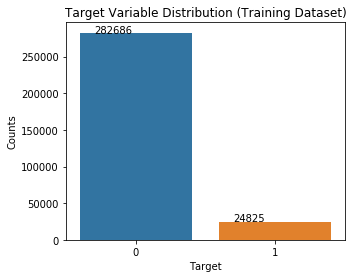

In [12]:
def plot_count_distribution(df,col_name):
    #define order of bars
    order = list(df[col_name].value_counts().index)
    plt.figure(figsize=(5,4))
    ax = sns.countplot(x=col_name,data=df)
    plt.title('Target Variable Distribution (Training Dataset)')
    plt.xlabel('Target')
    plt.ylabel('Counts')

    #include count labels on top of each bar
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+10))
    plt.show()

plot_count_distribution(data_train,'TARGET')

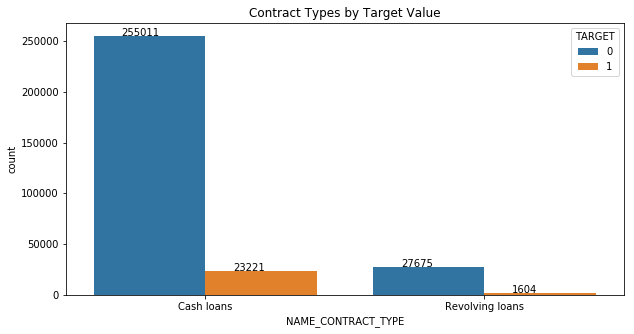

In [13]:
# Count Plot (a.k.a. Bar Plot)
plt.figure(figsize=(10,5))
plt.ylabel('Count')
plt.title('Contract Types by Target Value')
bar_plot = sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=data_train)
for p in bar_plot.patches:
        bar_plot.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.1,p.get_height()+10))
plt.show()

Age might be the features that has great effect on repaying the loan. We will plot some visulization using age as factor for target variable.

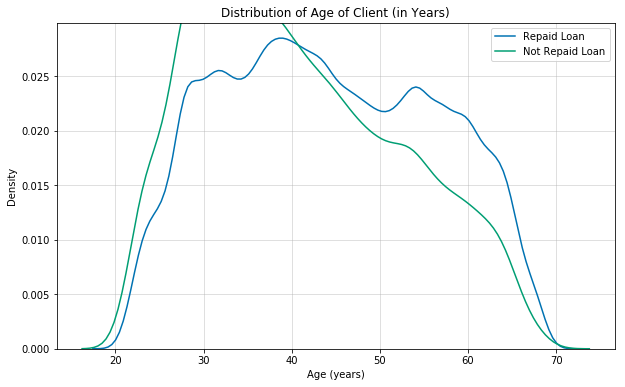

In [14]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'Repaid Loan')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'Not Repaid Loan')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Age of Client (in Years)');

In [15]:
# Age information into a separate dataframe
age_data = data_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data.loc[:,'DAYS_BIRTH'].copy() / -365
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups.drop(['DAYS_BIRTH'], axis=1, inplace=True)

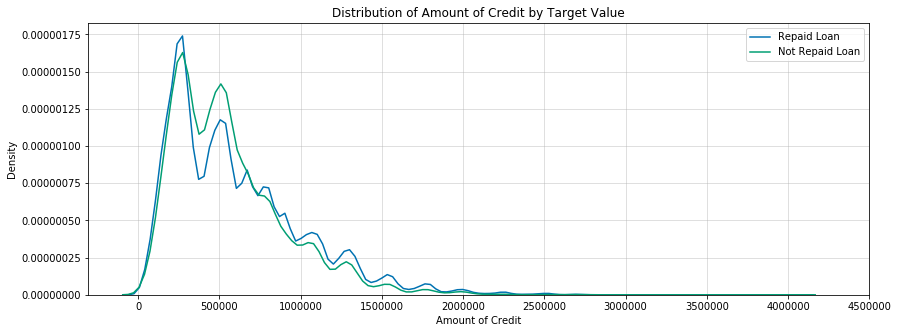

In [17]:
plt.figure(figsize=(14,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data_train.loc[data_train['TARGET'] == 0, 'AMT_CREDIT'], 
            label = 'Repaid Loan')
sns.kdeplot(data_train.loc[data_train['TARGET'] == 1, 'AMT_CREDIT'], 
            label = 'Not Repaid Loan')
plt.xlabel('Amount of Credit')
plt.xticks(np.arange(0, 5000000, 500000))
plt.ylabel('Density')
plt.title('Distribution of Amount of Credit by Target Value');

## Examine Missing Values
Next we can look at the number and percentage of missing values in each column.

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0]
                                    .sort_values('% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [19]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(25)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


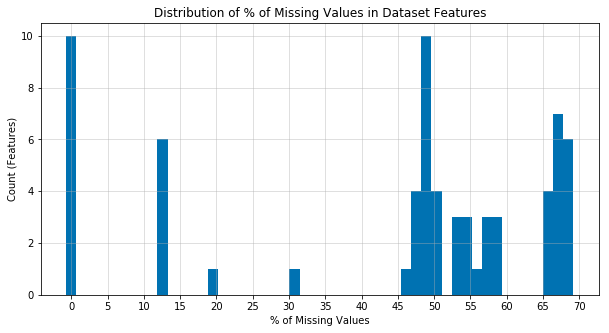

In [20]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
x = missing_values['% of Total Values']
x.hist(align='left', bins= 50)
plt.xticks(np.arange(0, 75, 5))
plt.xlabel('% of Missing Values')
plt.yticks(np.arange(0, 12, 2))
plt.ylabel('Count (Features)')
plt.title('Distribution of % of Missing Values in Dataset Features');
plt.show();

In [21]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

## Correlation

In [20]:
# Find correlations with the target and sort
correlations = data_train.corr()['TARGET'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(15))
print('\nMost Negative Correlations: \n', correlations.head(15))

Most Positive Correlations: 
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.03964

## Label Encoding and One Hot Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in data_train:
    if data_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(data_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(data_train[col])
            # Transform both training and testing data
            data_train[col] = le.transform(data_train[col])
            data_test[col] = le.transform(data_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [22]:
# one-hot encoding of categorical variables
df_train = pd.get_dummies(data_train)
df_test = pd.get_dummies(data_test)

print('Training Features shape for df_train: ', df_train.shape)
print('Testing Features shape for df_test: ', df_test.shape)
print('Training Features shape for data_train: ', data_train.shape)
print('Testing Features shape for data_test: ', data_test.shape)

Training Features shape for df_train:  (307511, 243)
Testing Features shape for df_test:  (48744, 239)
Training Features shape for data_train:  (307511, 122)
Testing Features shape for data_test:  (48744, 121)


In [23]:
train_labels = df_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)

# Add the target back in
df_train['TARGET'] = train_labels

print('Training Features shape: ', df_train.shape)
print('Testing Features shape: ', df_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [26]:
data_train.dtypes.value_counts()

float64    65
int64      41
object     13
int32       3
dtype: int64

## Normalize the data

In [24]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in df_train:
    train = df_train.drop('TARGET', axis=1)
else:
    train = df_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = df_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(df_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


# Baseline

## Building base line model for accuracy using Random Forest
* Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

Let's build the random forest classifer as the base model on raw data to check how it performs.

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
# Make the random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       random_state = 50, 
                                       verbose = 1, n_jobs = -1)

In [37]:
from sklearn.model_selection import train_test_split
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, test_size=0.3, stratify =train_labels)

In [38]:
# Train on the training data
random_forest.fit(X_train, y_train)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features,
                                    'importance': feature_importance_values})

# Make predictions on the test data
predictions_val = random_forest.predict_proba(X_test)[:, 1]
#predictions_test = random_forest.predict(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished


In [39]:
predictions_val.shape

(92254,)

In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, predictions_val))

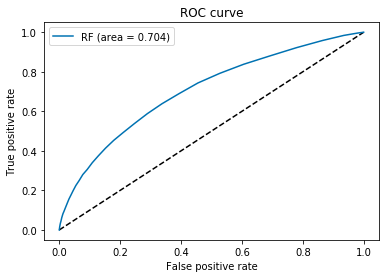

In [41]:
from sklearn.metrics import auc
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, predictions_val)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [42]:
# Train on the training data
random_forest.fit(train, train_labels)

# Extract feature importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 
                                    'importance': feature_importance_values})

# Make predictions on the test data
predictions_test = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.1s finished


In [43]:
plot_test = df_test[['SK_ID_CURR','EXT_SOURCE_2','EXT_SOURCE_3']]
plot_test['TARGET'] = predictions_test

In [44]:
#plot_predict_interaction(random_forest, plot_test, "rm", "EX")

In [45]:
# Make a submission dataframe
submit = df_test[['SK_ID_CURR']]
submit['TARGET'] = predictions_test

# Save the submission dataframe
submit.to_csv('random_forest_baseline.csv', index = False)

### Model Importance in Random Forest

In [46]:
def plot_feature_importances(df):
    """shows a plot of the 15 most importance features"""
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    return df

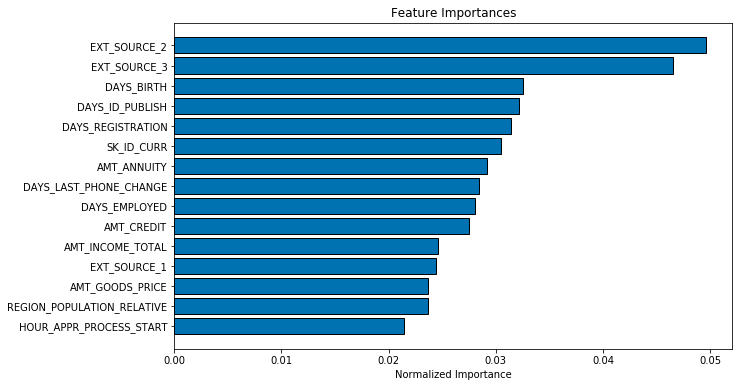

In [47]:
# Show the feature importances for the default features
feature_importances_sorted = plot_feature_importances(feature_importances)

## Light GBM

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

def model(features, test_features, encoding = 'ohe', n_folds = 5):  
    
    # Extract the ids
    train_ids = features['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']
    # Extract the labels for training
    labels = features['TARGET']
    
    # Remove the ids and target
    features = features.drop('SK_ID_CURR', axis=1)
    features = features.drop('TARGET', axis=1)
    test_features = test_features.drop('SK_ID_CURR', axis=1)
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [53]:
submission, fi, metrics = model(df_train, df_test)
print('Baseline metrics')
print(metrics)

Training Data Shape:  (307511, 238)
Testing Data Shape:  (48744, 238)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.755525	valid's binary_logloss: 0.563196	train's auc: 0.798882	train's binary_logloss: 0.552805
Early stopping, best iteration is:
[234]	valid's auc: 0.755743	valid's binary_logloss: 0.559787	train's auc: 0.804502	train's binary_logloss: 0.547872
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.758478	valid's binary_logloss: 0.563404	train's auc: 0.798461	train's binary_logloss: 0.553354
Early stopping, best iteration is:
[276]	valid's auc: 0.7587	valid's binary_logloss: 0.556356	train's auc: 0.810258	train's binary_logloss: 0.542887
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.762759	valid's binary_logloss: 0.564665	train's auc: 0.797491	train's binary_logloss: 0.554208
Early stopping, best iteration is:
[268]	valid's auc: 0.763116	valid's binary_logloss: 0.5579

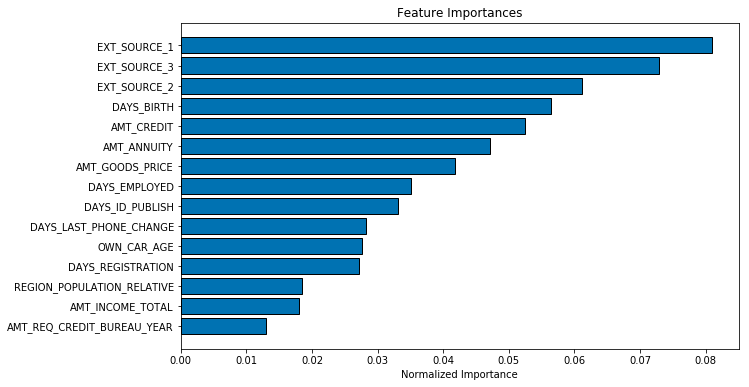

In [54]:
fi_sorted = plot_feature_importances(fi)

In [ ]:
submission.to_csv('baseline_lgb.csv', index = False)

## Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
mdl_abc =abc.fit(train,train_labels)

# Make predictions
# Make sure to select the second column only
abc_pred = mdl_abc.predict_proba(test)[:, 1]
# Submission dataframe
submit_ab = df_test[['SK_ID_CURR']]
submit_ab['TARGET'] = abc_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.06
1,100005,0.06
2,100013,0.06
3,100028,0.06
4,100038,0.14


In [ ]:
# Save the submission to a csv file
submit_ab.to_csv('abc_baseline.csv', index = False)
##
##outcome: AUC Score 0.73416

## Finding best parameters

In [18]:
hyperparameter = {'subsample_for_bin': 220000, 'learning_rate': 0.07016445423929361, 'num_leaves': 86, 'metric': 'auc', 'boosting_type': 'gbdt', 'verbose': 1, 'colsample_bytree': 0.6444444444444444, 'subsample': 0.5303030303030303, 'reg_alpha': 0.9591836734693877, 'min_child_samples': 390, 'is_unbalance': True, 'reg_lambda': 0.673469387755102}

In [25]:
test_ids = df_test['SK_ID_CURR']
train_labels = np.array(df_train['TARGET'].astype(np.int32)).reshape((-1, ))

train_random = df_train.drop(columns = ['SK_ID_CURR', 'TARGET'])
test_random = df_test.drop(columns = ['SK_ID_CURR'])

print('Training shape: ', train_random.shape)
print('Testing shape: ', test_random.shape)

Training shape:  (307511, 238)
Testing shape:  (48744, 238)


In [28]:
train_set = lgb.Dataset(train_random, label = train_labels)

# Cross validation with n_folds and early stopping
cv_results = lgb.cv(hyperparameter,
                    train_set,
                    num_boost_round = 10000, 
                    early_stopping_rounds = 100,
                    nfold = 5)

print('The cross validation score on the full dataset  for Random Search= {:.5f} with std: {:.5f}.'.format(
    cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('Number of estimators = {}.'.format(len(cv_results['auc-mean'])))

The cross validation score on the full dataset  for Random Search= 0.75812 with std: 0.00216.
Number of estimators = 119.


In [29]:
model = lgb.LGBMClassifier(n_estimators = len(cv_results['auc-mean']), **hyperparameter)
model.fit(train_random, train_labels)

preds = model.predict_proba(test_random)[:, 1]

submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds})
submission.to_csv('submission_random_search.csv', index = False)

In [30]:
hyper_b = {'learning_rate': 0.07218374731817535, 
           'reg_lambda': 0.7364934411848395, 
           'verbose': 1, 'subsample': 0.6195545022366721, 
           'subsample_for_bin': 60000, 'boosting_type': 'dart',
           'is_unbalance': True, 
           'num_leaves': 47, 'colsample_bytree': 0.6001712855022151, 
           'reg_alpha': 0.5969339070590824, 'min_child_samples': 485,
           'metric': 'auc'}

In [ ]:
# Cross validation with n_folds and early stopping
cv_results = lgb.cv(hyper_b, train_set,
                    num_boost_round = 10000, early_stopping_rounds = 100, 
                    metrics = 'auc', nfold = 5)

print('The cross validation score on the full dataset for Bayesian optimization = {:.5f} with std: {:.5f}.'.format(
    cv_results['auc-mean'][-1], cv_results['auc-stdv'][-1]))
print('Number of estimators = {}.'.format(len(cv_results['auc-mean'])))

In [31]:
model = lgb.LGBMClassifier(n_estimators = 107, **hyper_b)
model.fit(train_random, train_labels)

preds = model.predict_proba(test_random)[:, 1]

submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': preds})
submission.to_csv('submission_bayesian_optimization.csv', index = False)